In [1]:
import pandas as pd 
import numpy as np

In [2]:
landregister_1740 = pd.read_csv("../public/data_raw/1740_Catastici_2025-09-24.tsv", sep="\t", index_col=0)
display(landregister_1740)

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Function_GEOMETRY,PP_Bottega_STD,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes
0,AGN-0001,Davide Drago,PPL,1,Private,Private,Paolina Franco,NaN,casa in soler rovinosa,NaN,...,SOLER,NaN,NaN,NaN,NaN,NaN,NaN,Paolina,FRANCO,PERSON
1,AGN-0002,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Francesco Palamon,casa in soler,22,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
2,AGN-0003,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Rovo Bognolo,casa in soler,32,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
3,AGN-0004,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Zuanne Fanti,casa in soler,28,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
4,AGN-0005,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Michiel Gasparini,casa in soler,18,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31738,ZUL-0507,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Vicenzo Albrizzi,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31739,ZUL-0508,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Ambroso Busi,Appartamento di Casa di sopra,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31740,ZUL-0509,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Giuliani,Appartamento di casa di sotto,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31741,ZUL-0510,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Berti,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON


## Owners and tenants

In [ ]:
landregister_1740["ten_name_norm"] = (
    landregister_1740["ten_name"]
    .where(landregister_1740["ten_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)
landregister_1740["owner_name_norm"] = (
    landregister_1740["owner_name"]
    .where(landregister_1740["owner_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)

counts = landregister_1740["owner_name_norm"].dropna().value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Owner name")
ax.set_title("Most common owners")
plt.tight_layout()
plt.show()

counts = landregister_1740["ten_name_norm"].dropna().value_counts()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Tenant name")
ax.set_title("Most common tenants")
plt.tight_layout()
plt.show()


In [ ]:
landregister_1740[landregister_1740["ten_name_norm"] == "antonio rossi"]

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes,ten_name_norm,owner_name_norm
287,AGN-0288,Davide Drago,PPL,1,Private,Private,Lunardo Donà,Antonio Rossi,casa soler,74,...,NaN,NaN,NaN,NaN,NaN,Lunardo,DONA,PERSON,antonio rossi,lunardo donà
2483,BLD-0029,Francesca Zugno,PPL,1,Private,Private,Costantin Loredan,Antonio Rossi,Casa a pepian,24,...,NaN,NaN,NaN,NaN,NaN,Costantin,LOREDAN,PERSON,antonio rossi,costantin loredan
4902,CRO-0065,Francesca Zugno,PPL,1,Private,Private,Marin Ventura,Antonio Rossi,Casa,20,...,NaN,NaN,NaN,NaN,NaN,Marin,VENTURA,PERSON,antonio rossi,marin ventura
5267,CRO-0419,Francesca Zugno,PPL,1,Private,Private,Eminentissimo Cardinal Ottobon,Antonio Rossi,Casa,32,...,NaN,NaN,NaN,EMINENTISSIMO CARDINALE,NaN,NaN,OTTOBON,PERSON,antonio rossi,eminentissimo cardinal ottobon
6066,CSS-0425,Davide Drago,PPL,1,Private,Private,Nobil homo Anzolo Grassi,Antonio Rossi,casa,50,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Anzolo,GRASSI,PERSON,antonio rossi,nobil homo anzolo grassi
7844,GDO-0212,Davide Drago,PPL,1,Private,Private,Domenico Franceschi,Antonio Rossi,NaN,24,...,NaN,NaN,NaN,NaN,NaN,Domenico,FRANCESCHI,PERSON,antonio rossi,domenico franceschi
14084,MFO-0383,Davide Drago,PPL,1,Private,Private,Nobil homo Zuane Donà,Antonio Rossi,casa,35,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Zuane,DONA,PERSON,antonio rossi,nobil homo zuane donà
19342,MSE-0811a,Davide Drago,PPL,1,Private,Private,Zuanne Gradenigo de Vincenzo,Antonio Rossi,bottega da sartor e casa,49,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Zuanne,GRADENIGO DE VINCENZO,PERSON,antonio rossi,zuanne gradenigo de vincenzo
19343,MSE-0811b,Davide Drago,PPL_m,2,Private,Private,Piero procuratore pro tempore di Vito e Modest...,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,"PROCURATORE,_",NaN,"Piero,Modesto","DE PICCOLI,DE PICCOLI",PERSON,antonio rossi,piero procuratore pro tempore di vito e modest...
19344,MSE-0811c,Davide Drago,PPL,1,Private,Private,Bortolo Tolusi,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Bortolo,TOLUSI,PERSON,antonio rossi,bortolo tolusi


## Shop types and numbers

PP_Bottega_TRAD
(Person) Fruits                                                                                      230
(Person) Shoes                                                                                       208
(Person) Sausage                                                                                     186
(Person) Barber                                                                                      183
(Object) Jewellery                                                                                   145
                                                                                                    ... 
(Person) Turner,(Person) Tailor                                                                        1
(Person) Turner,(Person) Gilder                                                                        1
(Person) Wood sculpting,(Person) Vegetables                                                            1
(Person) Book binder / large-object pac

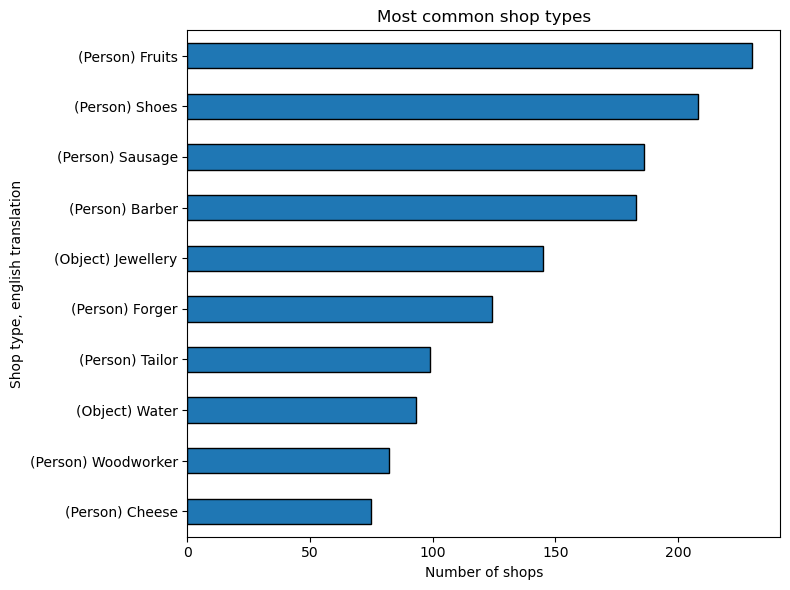

In [ ]:
counts = landregister_1740["PP_Bottega_TRAD"].dropna().value_counts()
display(counts)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[:10].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_xlabel("Number of shops")
ax.set_ylabel("Shop type, english translation")
ax.set_title("Most common shop types")
plt.tight_layout()
plt.show()


In [ ]:
merchants = pd.read_parquet("../public/data/merchants_dataset.parquet")
merchants.head()

,person,shop_count,shop_type,shop_type_eng,shop_category,shop_lat,shop_lng,house_lat,house_lng
0,Agostin Cigaggia,1,[FORMAGIER],[(Person) Cheese],[FOOD_DRINK],[5035730.88015714],[290857.01847614034],5.035731e+06,290857.018476
1,Agostin Fabris,1,[FORNER],[(Person) Oven],[FOOD_DRINK],[5035118.308935367],[292354.62244628853],5.035118e+06,292354.622446
2,Agostin Lazari,1,[FABRO],[(Person) Forger],[METAL_CRAFT],[5035133.210374592],[291466.5331725447],5.035004e+06,291898.158642
3,Agostin Meneghetti,1,[ORESE],[(Object) Jewellery],[LUXURY_ITEMS],[5035425.966183828],[291536.64384332683],5.035484e+06,291391.043150
4,Agostin Redolfi,2,"[SCALETER, SCALETER]","[(Person) Pastries, (Person) Pastries]","[FOOD_DRINK, FOOD_DRINK]","[5035236.682245659, 5035237.392795577]","[291390.2704865179, 291389.2441296375]",5.035237e+06,291390.270487


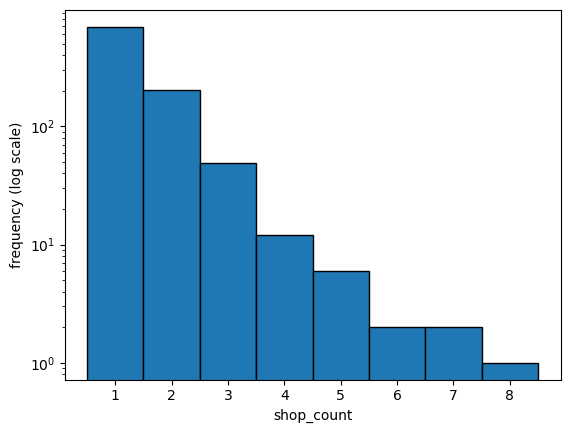

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s = merchants["shop_count"].dropna().astype(int)
minv, maxv = s.min(), s.max()

# create half-step bins so bars are centered on integers
bins = np.arange(minv - 0.5, maxv + 1.5, 1)

fig, ax = plt.subplots()
ax.hist(s, bins=bins, log=True, edgecolor="black")
ax.set_xticks(np.arange(minv, maxv + 1))   # tick positions under bars (integer centers)
ax.set_xlabel("shop_count")
ax.set_ylabel("frequency (log scale)")
plt.show()

In [ ]:
# shop types for merchants with shop_count > 3
df = merchants[merchants["shop_count"] > 3].copy()
counts = df["shop_type_eng"].value_counts()
display(counts)


shop_type_eng
[(Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery]                                                                                                                              1
[(Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese]                                                                                          1
[(Person) Oranges, (Person) Oranges, (Person) Oranges, (Person) Oranges]                                                                                                                                                          1
[(Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits]    1
[(Person) Tailor, (Person) Tailor, (Person) Tailor, (Person) Tailor, (Pers

In [ ]:
# show unique values of PP_Function_MID
# first split multiple values separated by commas into separate rows
landregister_1740 = landregister_1740.assign(
    PP_Function_MID=landregister_1740["PP_Function_MID"].str.split(",")
).explode("PP_Function_MID")

unique_values = landregister_1740["PP_Function_MID"].dropna().unique()
print("Unique values in 'PP_Function_MID':")
for value in unique_values:
    print(value)  

print("Total unique values:", len(unique_values))

Unique values in 'PP_Function_MID':
CASA
MAGAZZINO
CASA,BOTTEGA
INVIAMENTO
TERRENO
CAMERA
PALAZZO
CASA,SQUERO
SQUERO
OSPIZIO,CAMERA
BOTTEGA
POSTO
MAGAZZINO,CASA
BOTTEGA,MEZZANINA
FORNO,INVIAMENTO
CASA,MAGAZZINO
CASA,SCUOLA
BOTTEGA,CASETTA
BASTION,CASA
BOTTEGA,MAGAZZINO
CASA,PISTORIA
MEZZANINA
CASA,FORNO
CASA,CAMERA
CASETTA
SCUOLA
CARATI
FORNO
CASA,LOCANDA
CASETTA,BOTTEGA
CASA,TEATRO
TEATRO
CASA,BOTTEGA,MAGAZZINO
LOCANDA
MAGAZZINO,LOCANDA
BOTTEGA,CASA
OSPIZIO
MEZZANINA,CASA
CASA,BOTTEGA,INVIAMENTO
CASA,PALAZZO
CASA,ORTO
CASA,LOCO
BASTION
CASA,PALAZZO,ORTO
CASA,ORTO,BOTTEGA
CASINO
PALAZZO,ORTO
CASETTA,MAGAZZINO
CASA,FORNO,INVIAMENTO
BOTTEGA,CAMERA
CASA,CASETTA
BOTTEGA,INVIAMENTO
MAGAZZINO,CASETTA
CASETTA,CAMERA
CASA,MEZZANINA,BOTTEGA
MAGAZZINO,BOTTEGA
APPARTAMENTO
INVIAMENTO,BOTTEGA
APPARTAMENTO,BOTTEGA
BOTTEGA,VOLTA
PISTORIA,CASA
BOTTEGA,POSTO
TRAGHETTO
BOTTEGA,APPARTAMENTO
LOCO,SCUOLA
MAGAZZINO,MEZZANINA
FORNO,BOTTEGA
CASA,BOTTEGA,CASETTA
VOLTA
CASA,APPARTAMENTO
CASA,BOTTEGA,VOLTA
BOTT